In [67]:
import numpy as np
import matplotlib.pyplot as plt
import copy, math

np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

In [84]:
def run_gradient_descent_feng(X,y,iterations=1000, alpha = 1e-6):
    m,n = X.shape
    # initialize parameters
    initial_w = np.zeros(n)
    initial_b = 0
    # run gradient descent
    w_out, b_out, hist_out = gradient_descent(X ,y, initial_w, initial_b,
                                               compute_cost, compute_gradient_matrix, alpha, iterations)
    print(f"w,b found by gradient descent: w: {w_out}, b: {b_out:0.4f}")
    
    return(w_out, b_out)


In [71]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X : (array_like Shape (m,n)    matrix of examples 
      y : (array_like Shape (m,))    target value of each example
      w_in : (array_like Shape (n,)) Initial values of parameters of the model
      b_in : (scalar)                Initial value of parameter of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store values at each iteration primarily for graphing later
    hist={}
    hist["cost"] = []; hist["params"] = []; hist["grads"]=[]; hist["iter"]=[];
    
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    save_interval = np.ceil(num_iters/10000) # prevent resource exhaustion for long runs

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J,w,b at each save interval for graphing
        if i == 0 or i % save_interval == 0:     
            hist["cost"].append(cost_function(X, y, w, b))
            hist["params"].append([w,b])
            hist["grads"].append([dj_dw,dj_db])
            hist["iter"].append(i)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            #print(f"Iteration {i:4d}: Cost {cost_function(X, y, w, b):8.2f}   ")
            cst = cost_function(X, y, w, b)
            print(f"Iteration {i:9d}, Cost: {cst:0.5e}")
    return w, b, hist #return w,b and history for graphing

In [73]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    # size of first element 
    m = X.shape[0]
    
    cost = 0.0
    
    for i in range(m):   
        
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        
        cost += (f_wb_i - y[i])**2             #scalar
        
    cost = cost / (2 * m)                      #scalar    
    return cost

In [75]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        
        for j in range(n):                         
            dj_dw[j] += err * X[i, j] 
            
        dj_db += err        
        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [77]:
def compute_gradient_matrix(X, y, w, b): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X : (array_like Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,1)) actual value 
      w : (array_like Shape (n,1)) Values of parameters of the model      
      b : (scalar )                Values of parameter of the model      
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
                                  
    """
    m,n = X.shape
    f_wb = X @ w + b              
    e   = f_wb - y                
    dj_dw  = (1/m) * (X.T @ e)    
    dj_db  = (1/m) * np.sum(e)    
        
    return dj_db,dj_dw

Iteration         0, Cost: 1.65756e+03
Iteration       100, Cost: 6.94549e+02
Iteration       200, Cost: 5.88475e+02
Iteration       300, Cost: 5.26414e+02
Iteration       400, Cost: 4.90103e+02
Iteration       500, Cost: 4.68858e+02
Iteration       600, Cost: 4.56428e+02
Iteration       700, Cost: 4.49155e+02
Iteration       800, Cost: 4.44900e+02
Iteration       900, Cost: 4.42411e+02
w,b found by gradient descent: w: [18.7], b: -52.0834


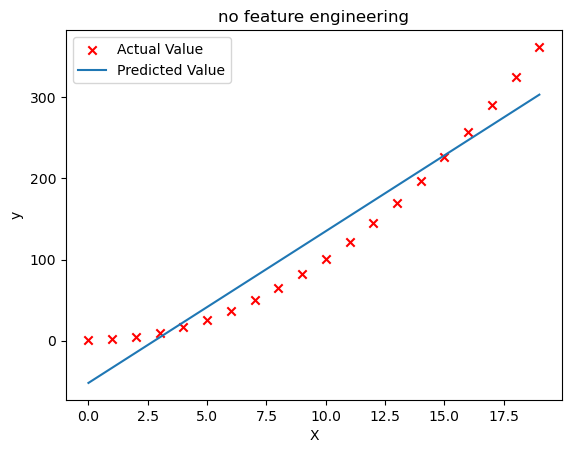

In [96]:
# create target data
x = np.arange(0, 20, 1)
y = 1 + x**2

X = x.reshape(-1, 1)


model_w,model_b = run_gradient_descent_feng(X,y,iterations=1000, alpha = 1e-2)

plt.scatter(x, y, marker='x', c='r', label="Actual Value");
plt.title("no feature engineering")

plt.plot(x,X@model_w + model_b, label="Predicted Value");  
plt.xlabel("X"); 
plt.ylabel("y"); 
plt.legend(); 
plt.show()

## polynomial feature

$y=w_0x_0^2 +b$


predicted model : $y=1*x_0^2+0.049$ 

target model :  $y=1*x_0^2+1$

Iteration         0, Cost: 7.32922e+03
Iteration      1000, Cost: 2.24844e-01
Iteration      2000, Cost: 2.22795e-01
Iteration      3000, Cost: 2.20764e-01
Iteration      4000, Cost: 2.18752e-01
Iteration      5000, Cost: 2.16758e-01
Iteration      6000, Cost: 2.14782e-01
Iteration      7000, Cost: 2.12824e-01
Iteration      8000, Cost: 2.10884e-01
Iteration      9000, Cost: 2.08962e-01
w,b found by gradient descent: w: [1.], b: 0.0490


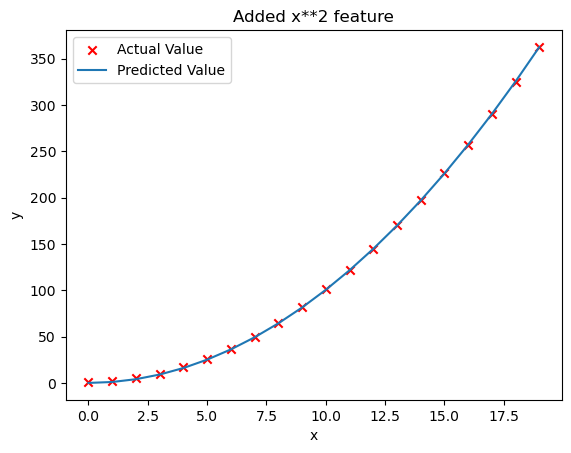

In [122]:
# create target data
x = np.arange(0, 20, 1)
y = 1 + x**2

# Engineer features 
X = x**2      #<-- added engineered feature

X = X.reshape(-1, 1)  #X should be a 2-D Matrix

model_w,model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha = 1e-5)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); 
plt.title("Added x**2 feature")
plt.plot(x, np.dot(X,model_w) + model_b, label="Predicted Value"); 
plt.xlabel("x"); 
plt.ylabel("y"); 
plt.legend(); 
plt.show()

now trying: 
$y=w_0x_0 + w_1x_1^2 + w_2x_2^3+b$

Iteration         0, Cost: 1.14029e+03
Iteration      1000, Cost: 3.28539e+02
Iteration      2000, Cost: 2.80443e+02
Iteration      3000, Cost: 2.39389e+02
Iteration      4000, Cost: 2.04344e+02
Iteration      5000, Cost: 1.74430e+02
Iteration      6000, Cost: 1.48896e+02
Iteration      7000, Cost: 1.27100e+02
Iteration      8000, Cost: 1.08495e+02
Iteration      9000, Cost: 9.26132e+01
w,b found by gradient descent: w: [0.08 0.54 0.03], b: 0.0106


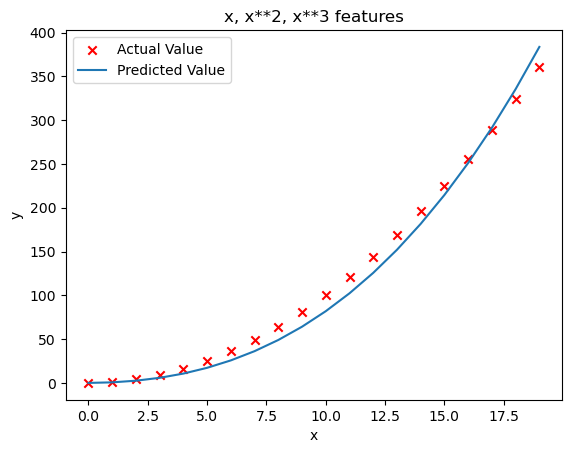

In [124]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]   #<-- added engineered feature

model_w,model_b = run_gradient_descent_feng(X, y, iterations=10000, alpha=1e-7)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); 
plt.title("x, x**2, x**3 features")
plt.plot(x, X@model_w + model_b, label="Predicted Value");
plt.xlabel("x"); 
plt.ylabel("y"); 
plt.legend(); 
plt.show()

predicted model :$$ 0.08x + 0.54x^2 + 0.03x^3 + 0.0106 $$
w1 has the most impact in fitting the data since its larger than w0, w2

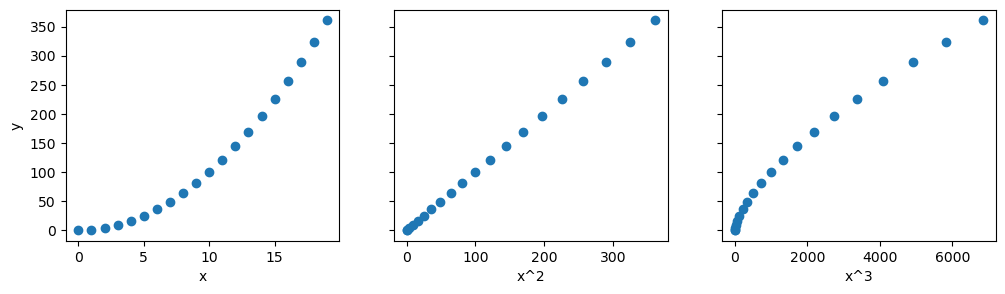

In [131]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]   #<-- added engineered feature
X_features = ['x','x^2','x^3']


fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()